## Dataset

In [10]:
import numpy as np
inputs = np.asarray([[0.41, -0.82, 0.4, -17.86, 12.1, -3.04], 
                    [-0.51, 0.43, -0.98, -26.13, -194.92, -104.68],
                    [-0.17,-0.37, -0.09, -14.88, 111.71, 249.1],
                    [0.26, -1.77,1.02, -57.93, -59.8, -62.57],
                    [-0.14, -0.02, 0.31, -98.3, -32.53, 36],
                    [-0.9, 0.12, 0.33, 3.97, -1.37, 3.29],
                    [-0.46, -0.36, 0.15, -3.4, 35.43, -250.16],
                    [-0.33, 1.59, 0.25, -51.21, 9.52, 8.8],
                    [-0.9, 0.84, 0.22,-18.46,21.86,39.09],
                    [-0.7, 0.18, 0.61, 9.84, -69.26, 131.69],
                    [0.02, 1.4, 0.18, -15.86, 68.22, 201.96],
                    [-0.06, -0.54, -0.66, 6.75, 7.06, -13.68],
                    [1, -0.33, -0.49, -8.83, -14, 8.9],
                    [-0.28, -0.4, -0.7, -33.92, -32.8, 28.59],
                    [0.36, -0.17, -0.65, 43.13, -240.97, 160.66],
                    [0.49, -0.27, -0.75, -56.23, 164.33, -116.62],
                    [1.06, -0.29, -0.09, -7.07, -0.92, -4.19],
                    [1.32, -0.29, -0.26, -119.39, 13.59, -47.81],
                    [-1.12, 0.77, 0.14, 14.98, 1.98, -40.39],
                    [0.23, -0.35, -0.18, -66.04, -95.84, -250.16],
                    [-0.75, 0.29, 0.14, 105.72, -11.58, 99.4],
                    [-0.84, -1.09, 0.47, 5.08, -13.17, 39.03]], dtype=np.single)

test = np.random.random_sample((6,28))
print(test.tolist())

labels = np.asarray([1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 3], dtype=np.int32) 

[[0.3438670785397061, 0.2650758401217005, 0.945051397961701, 0.05444620592013416, 0.2737056299731162, 0.9497785210892593, 0.10509257372271019, 0.32661341081480355, 0.6184799368774553, 0.9273615328122803, 0.46841301426955384, 0.22334292303433734, 0.3358031302239184, 0.8947869768837311, 0.26652881858168087, 0.5506168703865699, 0.7951776096984112, 0.37296108690835106, 0.5306255695915367, 0.7081774211783879, 0.8880391053553878, 0.7317030501399814, 0.4954537322490976, 0.6132881995828561, 0.3116454069724881, 0.7892763415799153, 0.07458485337096532, 0.8157986977565842], [0.8199520826487041, 0.5810799892955867, 0.03951328104635188, 0.8055069935549881, 0.9906473203831607, 0.27814508862795906, 0.6449469775690738, 0.5839589346144302, 0.5815348746560176, 0.18546036546437483, 0.11631275066421343, 0.18872976927629403, 0.21614622713717324, 0.589481328036014, 0.44524109566107883, 0.5780464512433596, 0.5457849989444641, 0.24033159440216412, 0.01309911253910967, 0.3815022593895512, 0.6522650208609311, 0

## Software Implementation

In [1]:
import pandas as pd 
import tensorflow as tf 
import matplotlib as plt
import glob
import numpy as np 
from tensorflow import keras
from keras import Sequential
from sklearn.utils import shuffle
import sklearn.model_selection
import time

model = keras.models.load_model('./final_base_model')

correct = 0
time_list = []

pred = model.predict(inputs)
result = np.argmax(pred, axis=1)

for i in range(len(inputs)):
    time_start = time.time()
    time_list.append((time.time() - time_start) * 1000)
    print(labels[i], result[i])
    if labels[i] == result[i]:
        correct +=1
    
print("time taken is", sum(time_list)/len(time_list), "ms")
print("accuracy is", correct/len(input) * 100, "%")

ModuleNotFoundError: No module named 'tensorflow'

## Hardware Implementation

In [ ]:
from pynq import Overlay
import pynq.lib.dma
overlay = Overlay('./final_2player/design_3_wrapper.bit')
help(overlay)
dma = overlay.axi_dma_0 

In [11]:
from pynq import Overlay
import pynq.lib.dma
from pynq import DefaultIP
from pynq import allocate
import struct
import numpy as np
import time
import glob
import pandas as pd
from struct import pack, unpack
import scipy.stats as stats

overlay = Overlay('./final_2player/design_3_wrapper.bit') # add path to bitstream
dma = overlay.axi_dma_0

def normalize(inputs):
    mean = np.mean(inputs)
    std = np.std(inputs)
    final = (inputs-mean)/std
    return final

def get_min(inputs):
    return np.min(inputs)

def get_max(inputs):
    return np.max(inputs)

def get_mean(inputs):
    return np.mean(inputs)

def get_std(inputs):
    return np.std(inputs)

def get_mad(inputs):
    arr = np.ma.array(inputs).compressed()
    med = np.median(arr)
    return np.median(np.abs(arr - med))

def get_range(inputs):
    return np.max(inputs)-np.min(inputs)

def get_kurtosis(inputs):
    return stats.kurtosis(inputs)

def get_power_spectrum(inputs):
    ft = np.fft.fft(inputs)
    return np.abs(ft**2)/len(inputs)

def get_max_f(inputs):
    S = get_power_spectrum(inputs)
    return np.max(S)

def get_mean_f(inputs):
    S = get_power_spectrum(inputs)
    return np.mean(S)

def get_std_f(inputs):
    S = get_power_spectrum(inputs)
    return np.std(S)

def get_kurtosis_f(inputs):
    S = get_power_spectrum(inputs)
    return stats.kurtosis(S)

def get_sum_f(inputs):
    S = get_power_spectrum(inputs)
    return np.sum(S)

def get_skew(inputs):
    return stats.skew(inputs)

def get_skew_f(inputs):
    S = get_power_spectrum(inputs)
    return stats.skew(S)

def get_power(inputs):
    return np.mean(inputs**2)

def get_ptp(inputs):
    return np.ptp(inputs)

def get_peak(inputs):
    return np.max(np.abs(inputs))

def get_peak_f(inputs):
    S = get_power_spectrum(inputs)
    return np.max(np.abs(S))

def get_rms(inputs):
    return np.sqrt(np.mean(inputs**2))

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())

def predicts(inputs, dma): #6 x 25
    output = []
    features = [] # 9 x 6
    inputs = np.asarray(inputs, dtype=np.single)
    #inputs = inputs.transpose()
    acc_x = normalize(inputs[0]) # array of 15 datapoints 
    acc_y = normalize(inputs[1]) # array of 15 datapoints 
    acc_z = normalize(inputs[2]) # array of 15 datapoints 
    gyro_x = normalize(inputs[3]) # array of 15 datapoints 
    gyro_y = normalize(inputs[4]) # array of 15 datapoints 
    gyro_z = normalize(inputs[5]) # array of 15 datapoints 
    stats1 = [get_range, get_min, get_max, get_mean, get_mad, get_kurtosis, get_mean_f, get_std_f, get_kurtosis_f]
    for func in stats1:
        features.append([func(acc_x), func(acc_y), func(acc_z), func(gyro_x), func(gyro_y), func(gyro_z)])
    features = np.asarray(features, dtype=np.single)
    features = features.flatten()
    input_buffer = allocate(shape = (54,), dtype=np.int32)
    for i in range(54):
        input_buffer[i] = unpack('i', pack('f', features[i]))[0]
    output_buffer = allocate(shape = (4,), dtype=np.int32)
    dma.sendchannel.transfer(input_buffer)
    dma.recvchannel.transfer(output_buffer)
    dma.sendchannel.wait()
    dma.recvchannel.wait()
    for i in range(4):
        output.append(unpack('f', pack('i',output_buffer[i]))[0])
    output = softmax(output)
    output = output.tolist().index(max(output))
    return output

output = predicts(test, dma)
print(output)
# outer_run = 0
# inner_run = 0
# while True:
#     outer_run += 1
#     outputs = []
#     inputs = []
#     inner_run += 1
#     count_zero = 0
#     count_one = 0
#     count_two = 0
#     count_three = 0
#     for j in range(len(inputs)-1):
#         if (abs(inputs[j+1][0] - inputs[j][0]) > 0.2) or (abs(inputs[j+1][1] - inputs[j][1]) > 0.2) or (abs(inputs[j+1][2] - inputs[j][2]) > 0.2):
#             output = predict(inputs[j])
#             if len(outputs) < 10:
#                 outputs.append(output)
#             else:
#                 outputs.pop(0)
#                 outputs.append(output)
#     count_zero = outputs.count(0)
#     count_one = outputs.count(1)
#     count_two = outputs.count(2)
#     count_three = outputs.count(3)
#     print(outputs)
#     if len(outputs) < 10:
#         pass
#     elif count_zero >= 8:
#         print('0')
#     elif count_one >= 8:
#         print('1')
#     elif count_two >= 8:
#         print('2')
#     elif count_three >= 8:
#         print('3')
#     else:
#         pass
#     print("inner run:", inner_run)
#     print("outer run:", outer_run)
#         #time.sleep(1.5)
    

# correct = 0
# time_list = []
# for i in range(len(inputs) - 1):
#     time_start = time.time()
#     output = predict(inputs[i], overlay, dma)
#     time_list.append((time.time() - time_start) * 1000)
#     print(labels[i], output)
#     if labels[i] == output:
#         correct+= 1

# print("time taken is", sum(time_list)/len(time_list), "ms")
# print("accuracy is", correct/len(inputs) * 100, "%")

2


## Hardware Resource Usage

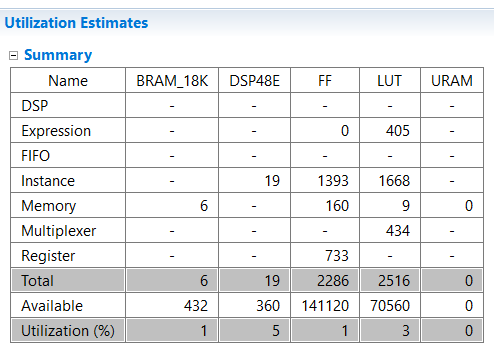

In [ ]:
import pynq
rails = pynq.get_rails()
rails

In [6]:
from pynq import Overlay
import pynq.lib.dma
from pynq import DefaultIP
from pynq import allocate
import struct
import numpy as np
import time
import glob
import pandas as pd
from struct import pack, unpack
import scipy.stats as stats

overlay = Overlay('./utility-server/final_model/design_3_wrapper.bit') # add path to bitstream
dma = overlay.axi_dma_0

accX_min = -2.0
accX_max = 1.9999
accY_min = -2.0
accY_max = 1.9999
accZ_min = -2.0
accZ_max = 1.9999
gccX_min = -256.8974
gccX_max = 254.8698
gccY_min = -249.6374
gccY_max = 251.2998
gccZ_min = -249.3074
gccZ_max = 252.9098

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())

def normalize(inputs, string):
    if string == 'ax':
        return (inputs - accX_min)/(accX_max-accX_min)
    elif string == 'ay':
        return (inputs - accY_min)/(accY_max-accY_min)
    elif string == 'az':
        return (inputs - accZ_min)/(accZ_max-accZ_min)
    elif string == 'gx':
        return (inputs - gccX_min)/(gccX_max-gccX_min)
    elif string == 'gy':
        return (inputs - gccY_min)/(gccY_max-gccY_min)
    else:
        return (inputs - gccZ_min)/(gccZ_max-gccZ_min)

def get_min(inputs):
    return np.min(inputs)

def get_max(inputs):
    return np.max(inputs)

def get_mean(inputs):
    return np.mean(inputs)

def get_std(inputs):
    return np.std(inputs)

def get_mad(inputs):
    arr = np.ma.array(inputs).compressed()
    med = np.median(arr)
    return np.median(np.abs(arr - med))

def get_range(inputs):
    return np.max(inputs)-np.min(inputs)

def get_kurtosis(inputs):
    return stats.kurtosis(inputs)

def get_power_spectrum(inputs):
    ft = np.fft.fft(inputs)
    return np.abs(ft**2)/len(inputs)

def get_max_f(inputs):
    S = get_power_spectrum(inputs)
    return np.max(S)

def get_mean_f(inputs):
    S = get_power_spectrum(inputs)
    return np.mean(S)

def get_std_f(inputs):
    S = get_power_spectrum(inputs)
    return np.std(S)

def get_kurtosis_f(inputs):
    S = get_power_spectrum(inputs)
    return stats.kurtosis(S)

def get_sum_f(inputs):
    S = get_power_spectrum(inputs)
    return np.sum(S)

def get_skew(inputs):
    return stats.skew(inputs)

def get_skew_f(inputs):
    S = get_power_spectrum(inputs)
    return stats.skew(S)

def get_power(inputs):
    return np.mean(inputs**2)

def get_ptp(inputs):
    return np.ptp(inputs)

def get_peak(inputs):
    return np.max(np.abs(inputs))

def get_peak_f(inputs):
    S = get_power_spectrum(inputs)
    return np.max(np.abs(S))

def get_rms(inputs):
    return np.sqrt(np.mean(inputs**2))

def predicts(inputs, dma): #6 x 35
    output = []
    features = [] # 9 x 6
    inputs = np.asarray(inputs, dtype=np.single)
    #inputs = inputs.transpose()
    acc_x = normalize(inputs[0], 'ax') # array of 15 datapoints 
    acc_y = normalize(inputs[1], 'ay') # array of 15 datapoints 
    acc_z = normalize(inputs[2], 'az') # array of 15 datapoints 
    gyro_x = normalize(inputs[3], 'gx') # array of 15 datapoints 
    gyro_y = normalize(inputs[4], 'gy') # array of 15 datapoints 
    gyro_z = normalize(inputs[5], 'gz') # array of 15 datapoints 
    stats1 = [get_min, get_max, get_mean, get_mad, get_kurtosis, get_mean_f, get_std_f, get_kurtosis_f, get_max_f]
    for func in stats1:
        features.append([func(acc_x), func(acc_y), func(acc_z), func(gyro_x), func(gyro_y), func(gyro_z)])
    features = np.asarray(features, dtype=np.single)
    features = features.flatten()
    input_buffer = allocate(shape = (54,), dtype=np.int32)
    for i in range(54):
        input_buffer[i] = unpack('i', pack('f', features[i]))[0]
    output_buffer = allocate(shape = (4,), dtype=np.int32)
    dma.sendchannel.transfer(input_buffer)
    dma.recvchannel.transfer(output_buffer)
    dma.sendchannel.wait()
    dma.recvchannel.wait()
    for i in range(4):
        output.append(unpack('f', pack('i',output_buffer[i]))[0])
    output = softmax(output)
    output = output.tolist().index(max(output))
    return output
    

inputs = np.random.rand(50, 6, 35)

correct = 0
time_list = []
for i, inp in enumerate(inputs):
    time_start= time.time()
    output = predicts(inp, dma)
    time_list.append((time.time() - time_start )* 1000)
#print("accuracy:" , correct / total * 100 , "%")
print("avg_time = ", sum(time_list)/ len(time_list), 'ms')

avg_time =  26.60773754119873 ms
